### Context
**Drugs prediction with decision tree model**

This notebook demonstrates a complete machine learning workflow using **logistic regression** to predict customer churn 

We follow a standard ML pipeline:

1. **Load & Explore Data** 
2. **Preprocess Data**
3. **Split Data** 
4. **Train Model** 
5. **Evaluate Model** 
6. **Interpret Results** 

###  Installing libs
-  Versions in this tutorial:
```
!pip install numpy==2.2.5
!pip install pandas==2.2.1
!pip install matplotlib==3.10.0
!pip install scikit-learn==1.6.1
```

### Importing dependencies

In [65]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load & Explore Data

In [66]:
df = pd.read_csv('datasets/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Checking feature types and nulls

In [67]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**Drug type distribution**

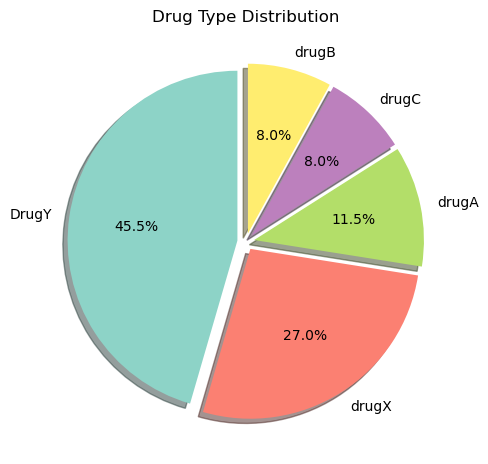

In [68]:
drug_counts = df['Drug'].value_counts()
plt.figure(figsize=(5, 5))
drug_counts.plot.pie(
    autopct='%1.1f%%',      # Show percentages
    startangle=90,          # Rotate start angle
    shadow=True,            # Add shadow for aesthetics
    explode=[0.05]*len(drug_counts),  # Slight separation between slices
    cmap='Set3'             # Optional color map
)
plt.ylabel('')              # Remove default y-label
plt.title('Drug Type Distribution')
plt.tight_layout()
plt.show()

### Preprocess Data

Converting categorical features to numeric

In [69]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex']) 
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol']) 
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


Checking missing values

In [70]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Mapping target variable

In [71]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'DrugY':4}
df['Drug_num'] = df['Drug'].map(custom_map)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,DrugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,DrugY,4


Verifying the correlations

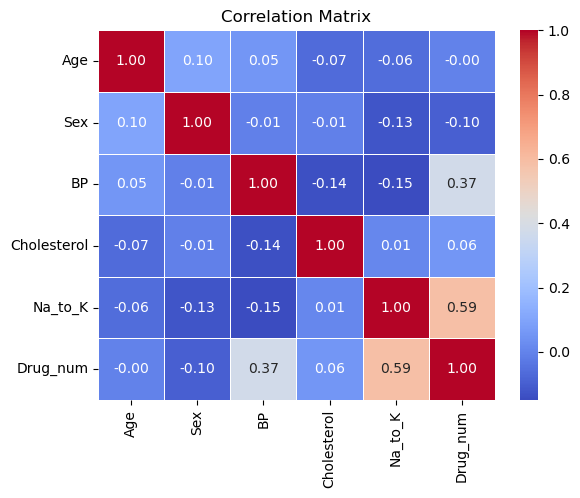

In [72]:
c = df.drop('Drug', axis=1)
corr_matrix = c.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Split Data

In [73]:
y = df['Drug_num']
X = df.drop(['Drug'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

### Train Model

In [74]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Evaluate Model

In [75]:
y_pred = decisionTree.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Decision Trees's Accuracy:  1.0


### Interpret Results

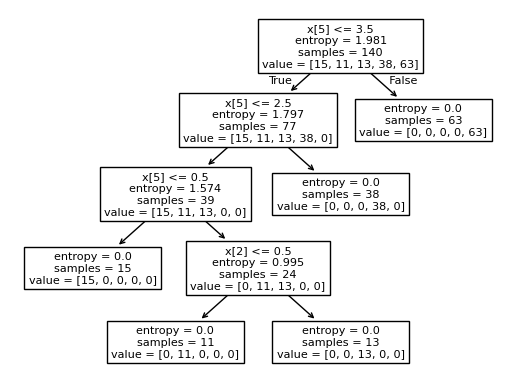

In [76]:
plot_tree(decisionTree)
plt.show()